## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [7]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [8]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [9]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [11]:
model = build_mlp()
model.summary()
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 63us/step - loss: 2.2728 - acc: 0.1561 - val_loss: 2.2174 - val_acc: 0.1972
Epoch 2/500
50000/50000 [==============================] - 3s 57us/step - loss: 2.1817 - acc: 0.2241 - val_loss: 2.1531 - val_acc: 0.2343
Epoch 3/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.1263 - acc: 0.2510 - val_loss: 2.1057 - val_acc: 0.2556
Epoch 4/500
50000/50000 [==============================] - 3s 57us/step - loss: 2.0829 - acc: 0.2659 - val_loss: 2.0670 - val_acc: 0.2706
Epoch 5/500
50000/50000 [==============================] - 3s 53us/step - loss: 2.0472 - acc: 0.2790 - val_loss: 2.0346 - val_acc: 0.2883
Epoch 6/500
50000/50000 [==============================] - 3s 54us/step - loss: 2.0168 - acc: 0.2930 - val_loss: 2.0080 - val_acc: 0.2942
Epoch 7/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.9909 - acc: 0.3048 - val_loss: 1.9829 - 

50000/50000 [==============================] - 3s 53us/step - loss: 1.6556 - acc: 0.4249 - val_loss: 1.6597 - val_acc: 0.4181
Epoch 60/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.6523 - acc: 0.4269 - val_loss: 1.6581 - val_acc: 0.4162
Epoch 61/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.6494 - acc: 0.4284 - val_loss: 1.6598 - val_acc: 0.4186
Epoch 62/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.6465 - acc: 0.4284 - val_loss: 1.6513 - val_acc: 0.4192
Epoch 63/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.6436 - acc: 0.4299 - val_loss: 1.6479 - val_acc: 0.4209
Epoch 64/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.6405 - acc: 0.4314 - val_loss: 1.6462 - val_acc: 0.4212
Epoch 65/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.6378 - acc: 0.4312 - val_loss: 1.6440 - val_acc: 0.4228
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.5199 - acc: 0.4724 - val_loss: 1.5399 - val_acc: 0.4607
Epoch 119/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.5178 - acc: 0.4730 - val_loss: 1.5394 - val_acc: 0.4587
Epoch 120/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.5160 - acc: 0.4742 - val_loss: 1.5467 - val_acc: 0.4599
Epoch 121/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.5142 - acc: 0.4752 - val_loss: 1.5370 - val_acc: 0.4633
Epoch 122/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.5124 - acc: 0.4748 - val_loss: 1.5366 - val_acc: 0.4615
Epoch 123/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.5107 - acc: 0.4747 - val_loss: 1.5317 - val_acc: 0.4654
Epoch 124/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.5088 - acc: 0.4761 - val_loss: 1.5329 - val_acc: 0.4619
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 56us/step - loss: 1.4254 - acc: 0.5033 - val_loss: 1.4760 - val_acc: 0.4760
Epoch 177/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4246 - acc: 0.5033 - val_loss: 1.4719 - val_acc: 0.4813
Epoch 178/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4226 - acc: 0.5056 - val_loss: 1.4665 - val_acc: 0.4813
Epoch 179/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4211 - acc: 0.5051 - val_loss: 1.4650 - val_acc: 0.4832
Epoch 180/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4195 - acc: 0.5062 - val_loss: 1.4652 - val_acc: 0.4816
Epoch 181/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4181 - acc: 0.5058 - val_loss: 1.4630 - val_acc: 0.4815
Epoch 182/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.4169 - acc: 0.5069 - val_loss: 1.4716 - val_acc: 0.4806
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 57us/step - loss: 1.3475 - acc: 0.5298 - val_loss: 1.4301 - val_acc: 0.4960
Epoch 235/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.3459 - acc: 0.5298 - val_loss: 1.4219 - val_acc: 0.4949
Epoch 236/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.3446 - acc: 0.5302 - val_loss: 1.4391 - val_acc: 0.4900
Epoch 237/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.3440 - acc: 0.5302 - val_loss: 1.4207 - val_acc: 0.4948
Epoch 238/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.3419 - acc: 0.5314 - val_loss: 1.4183 - val_acc: 0.4980
Epoch 239/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.3412 - acc: 0.5330 - val_loss: 1.4190 - val_acc: 0.4989
Epoch 240/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.3397 - acc: 0.5323 - val_loss: 1.4152 - val_acc: 0.4955
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 57us/step - loss: 1.2778 - acc: 0.5531 - val_loss: 1.3892 - val_acc: 0.5069
Epoch 293/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2763 - acc: 0.5549 - val_loss: 1.3899 - val_acc: 0.5031
Epoch 294/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.2753 - acc: 0.5551 - val_loss: 1.3868 - val_acc: 0.5088
Epoch 295/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2743 - acc: 0.5563 - val_loss: 1.3800 - val_acc: 0.5113
Epoch 296/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.2730 - acc: 0.5560 - val_loss: 1.3815 - val_acc: 0.5102
Epoch 297/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2728 - acc: 0.5567 - val_loss: 1.3823 - val_acc: 0.5122
Epoch 298/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.2709 - acc: 0.5571 - val_loss: 1.3832 - val_acc: 0.5101
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 55us/step - loss: 1.2134 - acc: 0.5776 - val_loss: 1.3566 - val_acc: 0.5182
Epoch 351/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.2128 - acc: 0.5766 - val_loss: 1.3593 - val_acc: 0.5233
Epoch 352/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.2115 - acc: 0.5768 - val_loss: 1.3511 - val_acc: 0.5244
Epoch 353/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2114 - acc: 0.5771 - val_loss: 1.3822 - val_acc: 0.5130
Epoch 354/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.2101 - acc: 0.5786 - val_loss: 1.3514 - val_acc: 0.5235
Epoch 355/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2072 - acc: 0.5787 - val_loss: 1.3539 - val_acc: 0.5243
Epoch 356/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.2083 - acc: 0.5783 - val_loss: 1.3870 - val_acc: 0.5108
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 56us/step - loss: 1.1528 - acc: 0.5986 - val_loss: 1.3517 - val_acc: 0.5237
Epoch 409/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1528 - acc: 0.5985 - val_loss: 1.3376 - val_acc: 0.5273
Epoch 410/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.1509 - acc: 0.5987 - val_loss: 1.3393 - val_acc: 0.5294
Epoch 411/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.1509 - acc: 0.5978 - val_loss: 1.3401 - val_acc: 0.5297
Epoch 412/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1497 - acc: 0.5981 - val_loss: 1.3468 - val_acc: 0.5286
Epoch 413/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1483 - acc: 0.6000 - val_loss: 1.4048 - val_acc: 0.5047
Epoch 414/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1488 - acc: 0.6001 - val_loss: 1.3460 - val_acc: 0.5267
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 56us/step - loss: 1.0964 - acc: 0.6188 - val_loss: 1.3399 - val_acc: 0.5287
Epoch 467/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.0936 - acc: 0.6204 - val_loss: 1.3350 - val_acc: 0.5310
Epoch 468/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0945 - acc: 0.6179 - val_loss: 1.3982 - val_acc: 0.5129
Epoch 469/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.0976 - acc: 0.6166 - val_loss: 1.3453 - val_acc: 0.5242
Epoch 470/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.0920 - acc: 0.6191 - val_loss: 1.3360 - val_acc: 0.5320
Epoch 471/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.0917 - acc: 0.6209 - val_loss: 1.3462 - val_acc: 0.5309
Epoch 472/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.0906 - acc: 0.6191 - val_loss: 1.3583 - val_acc: 0.5235
Epoch 473/500
50000/50000 [=======

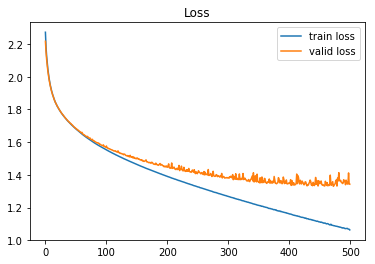

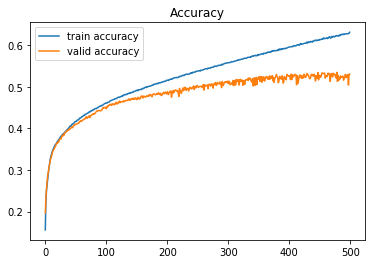

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()